<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [36]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<font color='red' style="font-weight:bold;">

<p>
Please run the above cell to obtain your table of contents.
</p>
</font>

# Fraud Audit dataset

```
https://archive.ics.uci.edu/ml/datasets/Audit+Data


The dataset provides information about firms' Risk factors like Audit Discrepancies, Loss sufferred, historical loss and so on, and whether the company was found to be at Risk or not.
```

# Import Packages

In [6]:
#### Import Packages

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling.model.correlations import *
import scipy.stats as ss
import itertools
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix


# Key Takeaways for Business

<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from Pandas profiling report and PhiK Correlation Analysis </u></p> </font> 

- There are 13 duplicate rows(out of a total of 776 rows (1.7%))
- Missing value in Money_value (Just 1 value missing out of 776 values)


- Sector_Score is correlated with Risk, Score and Money_Value
- Variables like Risk and Score seem to be negatively correlated with Sector Score.i.e. Higher the sector score, lower is the Risk
- Score is Correlated with Numbers
- Location id is correlated with District Loss and numbers 
- PARA_A and PARA_B seems to be correlated with each other
    

</font>
<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from EDA </u></p> </font> 

<p><li>Sector Score can be a great indicator of risky firms. Lower the score, higher is the chance of a firm being risky</li></p>
<p><li>Location_IDs 2 and 19 have a large percentage of risky firms.Hence there should be more regulations and audits in these locations</li></p>
 <p><li>Lower the discrepancies in audit reports (PARA_A and PARA_B values), lower is the risk of being fraudulent.Hence, PARA_A and PARA_B value could play a pivotal role in determining the risk of a firm</li></p>   
  <p><li>Higher the number (Historical discrepancy score), higher is the risk of a firm</li></p>  
   <p><li>Higher the amount of money in mis-statements(Money Value), higher is the risk of a firm</li></p>    
 <p><li>Higher the District Loss, higher is the propensity of a firm being in risk</li></p>  
     <p><li>Higher the History (Average historical loss suffered by the firm in the last 10 years), higher is the propensity of a firm being in risk</li></p>  
       <p><li>Higher the Score, higher is the risk of a firm</li></p> 
</font>

</font>
<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Summary from Modelling, Feature importances and SHAP </u></p> </font> 

<p><li>Gradient Boosting Classifier	is the best classification model with an out-of-bag AUC of 0.967</li></p>
 <p><li>Best Predictors of the model are : 
      <ol>Score</ol>
      <ol>Money Value</ol>
      <ol>PARA_B</ol>
     <ol>PARA_A</ol></li></p>   
<p><li> Score in the lower quantile is the most important feature. It is most probably due to the fact that if a firm has a lower score, then it is most likely non-risky in nature</li></p>
<p><li> Money Value in the highest quantile is the 2nd most important because if a firm falling into this bucket, it is most likely at risk</li></p>
    <p><li> PARA_A and PARA_B are also showing up as critical features to determine the riskiness of a company</li></p>
</font>

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>Takeaways from SHAP plot</u></p> </font>
<p><li> As Score in the first quantile increases in value, then model output decreases. i.e. as the feature Score_bins_(1.9 2.4) becomes 1, then Risk becomes 0. In other words, When a firm has low values of Score, it is most likely to be non-risky </li></p>
<p><li> As Money_value in the fourth quantile increases in value, then model output increases. i.e. as the feature Money_Value_bins_(6.0 935.0 becomes 1, then Risk becomes 1. In other words, When a firm has high values of Money_values, it is most likely to be risky </li></p>
<p><li> In a nutshell, Score,Money_value,PARA_A, PARA_B values are found to be very important in determining risk </li></p>
</font>


<b>Please dive deeper into the each sections to understand better</b>



# Profiling report and Correlations

In [29]:
df_fraud=pd.read_csv("audit_risk_data.csv", sep=',')
df_fraud

Sector_score LOCATION_ID  PARA_A  PARA_B  numbers  Money_Value  \
0            3.89          23    4.18    2.50      5.0         3.38   
1            3.89           6    0.00    4.83      5.0         0.94   
2            3.89           6    0.51    0.23      5.0         0.00   
3            3.89           6    0.00   10.80      6.0        11.75   
4            3.89           6    0.00    0.08      5.0         0.00   
..            ...         ...     ...     ...      ...          ...   
771         55.57           9    0.49    0.40      5.0         0.00   
772         55.57          16    0.47    0.37      5.0         0.00   
773         55.57          14    0.24    0.04      5.0         0.00   
774         55.57          18    0.20    0.00      5.0         0.00   
775         55.57          15    0.00    0.00      5.0         0.32   

     District_Loss  History  Score  Risk  
0                2        0    2.4     1  
1                2        0    2.0     0  
2                2        0    2.0     0  
3                2        0    4.4     1  
4                2        0    2.0     0  
..             ...      ...    ...   ...  
771              2        0    2.0     0  
772              2        0    2.0     0  
773              2        0    2.0     0  
774              2        0    2.0     0  
775              2        0    2.0     0  

[776 rows x 10 columns]

### Pandas profiling report

Pandas Profiling is a library used to obtain a quick report of your data, and to obtain some useful hidden insights in very less span of time. It shows explorations, correlations, missing values , duplicates and several different information, which typically would take a data scientist a lot of time to obtain. The results of pandas-profiling cannot be saved onto the notebook, and hence will have to run it to obtain outputs

In [8]:
profile = ProfileReport(df_fraud, title='Fraud Audit Profiling Report', explorative=True)

In [9]:
profile.to_notebook_iframe()

### Phik (φk) correlations

The correlation coefficient ϕK provides a way to analyse dependencies among any type of variables (Categorical or numerical or ordinal), and is very similar to Pearson’s correlation coefficient

More information on Phik correlations can be found in the below link : 
https://phik.readthedocs.io/en/latest/tutorials.html

Hence, we are performing ϕK correlations to the fraud dataset to understand which variables are related to each other

In [5]:
phik_overview = df_fraud.phik_matrix()
#phik_overview

interval columns not set, guessing: ['Sector_score', 'PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'District_Loss', 'History', 'Score', 'Risk']


In [7]:
df_fraud.phik_matrix()

interval columns not set, guessing: ['Sector_score', 'PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'District_Loss', 'History', 'Score', 'Risk']


Sector_score  LOCATION_ID    PARA_A    PARA_B   numbers  \
Sector_score       1.000000     0.104215  0.230568  0.000000  0.207310   
LOCATION_ID        0.104215     1.000000  0.000000  0.000000  0.637138   
PARA_A             0.230568     0.000000  1.000000  0.512457  0.159681   
PARA_B             0.000000     0.000000  0.512457  1.000000  0.164986   
numbers            0.207310     0.637138  0.159681  0.164986  1.000000   
Money_Value        0.435817     0.259426  0.591775  0.470774  0.289829   
District_Loss      0.180591     0.749763  0.210434  0.242613  0.133793   
History            0.075856     0.000000  0.357166  0.319511  0.434842   
Score              0.435500     0.446077  0.324459  0.479590  0.780156   
Risk               0.624020     0.351538  0.294542  0.044428  0.300701   

               Money_Value  District_Loss   History     Score      Risk  
Sector_score      0.435817       0.180591  0.075856  0.435500  0.624020  
LOCATION_ID       0.259426       0.749763  0.000000  0.446077  0.351538  
PARA_A            0.591775       0.210434  0.357166  0.324459  0.294542  
PARA_B            0.470774       0.242613  0.319511  0.479590  0.044428  
numbers           0.289829       0.133793  0.434842  0.780156  0.300701  
Money_Value       1.000000       0.109614  0.233025  0.287049  0.266312  
District_Loss     0.109614       1.000000  0.160823  0.438359  0.250585  
History           0.233025       0.160823  1.000000  0.497315  0.284143  
Score             0.287049       0.438359  0.497315  1.000000  0.970775  
Risk              0.266312       0.250585  0.284143  0.970775  1.000000

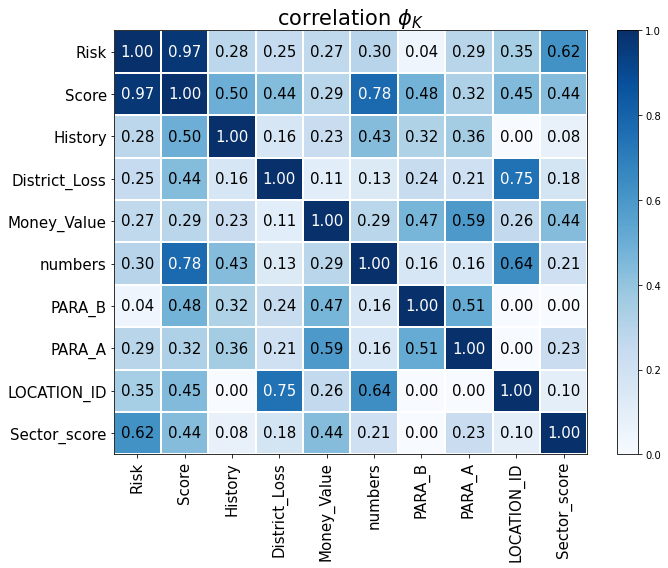

In [8]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,8))
plt.tight_layout()


<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Points to note from Pandas profiling report and PhiK Correlation Analysis </u></p> </font> 

- There are 13 duplicate rows(out of a total of 776 rows (1.7%))
- Missing value in Money_value (Just 1 value missing out of 776 values)


- Sector_Score is correlated with Risk, Score and Money_Value
- Variables like Risk and Score seem to be negatively correlated with Sector Score.i.e. Higher the sector score, lower is the Risk
- Score is Correlated with Numbers
- Location id is correlated with District Loss and numbers 
- PARA_A and PARA_B seems to be correlated with each other
    

</font>

# Exploratory Data Analysis (EDA)

It is customary to perform EDA on any dataset, before proceeding to data pre-processing and modelling stages, to get a feel of the data and to understand more about different relationships. In this exercise, I have performed EDA on all variables with respect to Risk. Important points are highlighted in <font color='red' style="font-weight:bold;">red color</font>

I request the reader to go through the notebook like a story book , and read all the comments written in the notebook to have a better understanding of my approach towards the data analysis problem


In [14]:
"""
Define Plot functions that will be used in the rest of the notebook

"""

def plot_var_per_Risk(var,height=4,aspect=1.5,col_wrap=4,size='large',rotation=0,precision=2,percentage=True):
    """
    This function is used to plot any Variable per Risk type as a percentage (Ex : Risk = 0 contains 80% of var=1)
    """
    df_fraud_SS_R=df_fraud.groupby(['Risk',var])['Score'].count()
    df_fraud_SS_R
    df_fraud_SS_R_1=(df_fraud_SS_R/df_fraud_SS_R.groupby(level=[0]).transform('sum')*100).reset_index()
    df_fraud_SS_R_1.rename(columns={"Score": "Percentage"},inplace=True)
    #sns.set_theme(style="darkgrid")
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(4, 3))
    g = sns.catplot(x=var,y="Percentage",col="Risk",col_wrap=col_wrap
                    ,data=df_fraud_SS_R_1
                    ,orient="v",
                    kind='bar', height=height, aspect=aspect, legend=True)


    g.set_xticklabels(rotation=rotation)
    
    if(percentage):
        for i in range(df_fraud.loc[:,'Risk'].nunique()):
            ax = g.facet_axis(i,i)
            for p in ax.patches:
                ax.text(p.get_x() + 0.015, 
                        p.get_height() * 1.02, 
                        '{0:.{precision}f}%'.format(p.get_height(),precision=precision), 
                        color='black', rotation='horizontal', size=size)
    else :
        for i in range(2):
            ax = g.facet_axis(i,i)
            for p in ax.patches:
                ax.text(p.get_x() + 0.015, 
                        p.get_height() * 1.02, 
                        '{0:.{precision}f}'.format(p.get_height(),precision=precision), 
                        color='black', rotation='horizontal', size=size)
        


def plot_Risk_per_var(var,height=4,aspect=1.5,col_wrap=4,size='large',rotation=0,precision=2,percentage=True):
    df_fraud_SS_R=df_fraud.groupby([var,'Risk'])['Score'].count()
    df_fraud_SS_R
    df_fraud_SS_R_1=(df_fraud_SS_R/df_fraud_SS_R.groupby(level=[0]).transform('sum')*100).reset_index()
    df_fraud_SS_R_1.rename(columns={"Score": "Percentage"},inplace=True)
    #sns.set_theme(style="darkgrid")
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(4, 3))
    g = sns.catplot(x="Risk",y="Percentage",col=var,col_wrap=col_wrap
                    ,data=df_fraud_SS_R_1
                    ,orient="v",
                    kind='bar', height=height, aspect=aspect, legend=True)


    
    g.set_xticklabels(rotation=rotation)
    
    if(percentage):
        for i in range(df_fraud.loc[:,var].nunique()):
            ax = g.facet_axis(i,i)
            for p in ax.patches:
                ax.text(p.get_x() + 0.015, 
                        p.get_height() * 1.02, 
                        '{0:.{precision}f}%'.format(p.get_height(),precision=precision), 
                        color='black', rotation='horizontal', size=size)
    else :
        for i in range(df_fraud.loc[:,var].nunique()):
            ax = g.facet_axis(i,i)
            for p in ax.patches:
                ax.text(p.get_x() + 0.015, 
                        p.get_height() * 1.02, 
                        '{0:.{precision}f}'.format(p.get_height(),precision=precision), 
                        color='black', rotation='horizontal', size=size)
        

## Sector score vs Risk

Here, we compare Sector Score and Risk. On initially plotting both variables, we see that Sector Score would typically be a numerical variable, and could have a large range. In this dataset, the range of Sector Score is limited to 59.85. But nevertheless, It would be benificial to Bin the variable for data analysis and also for modelling. This will enable us to obtain better insights.

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


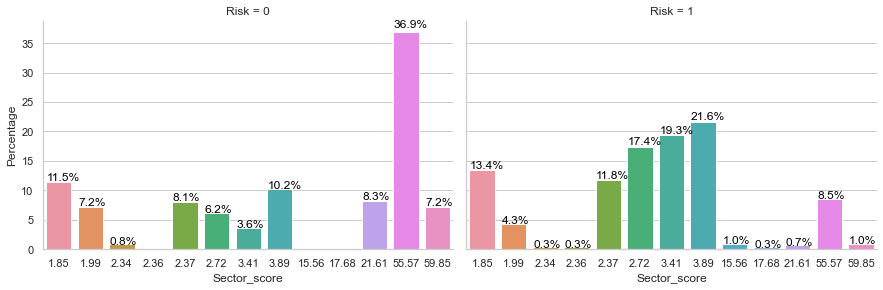

In [78]:
plot_var_per_Risk('Sector_score',size="medium",precision=1)

Binning Sector Score based on Quantiles (Here I am taking 4 quantiles to perform binning)

In [40]:
# Bin Sector score
df_fraud['Sector_score_bins'] = pd.qcut(df_fraud['Sector_score'], q=4,duplicates='drop',precision=0)

<Figure size 288x216 with 0 Axes>

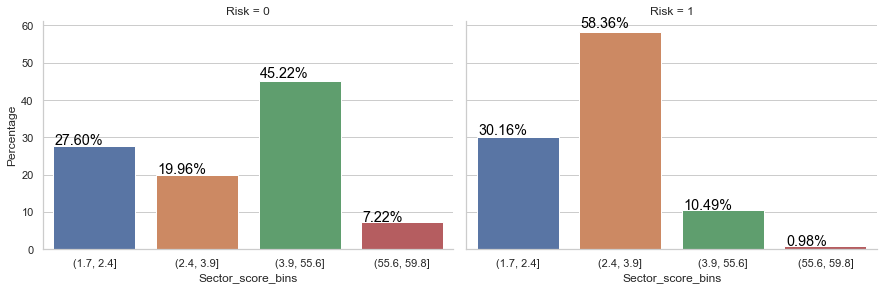

In [41]:
plot_var_per_Risk('Sector_score_bins')

<font color='red' style="font-weight:bold;">

<p>
The above graph shows the percentage distribution of binned Sector Scores per Risk Category.
From the above graph, we can notice that firms that have low risk usually tend to have a Sector Score of above 3.9.
Majority of the firms (Almost 88%) of the firms that possess risk of being fraudulent usually have lower Sector Scores
</p>
</font>

<Figure size 288x216 with 0 Axes>

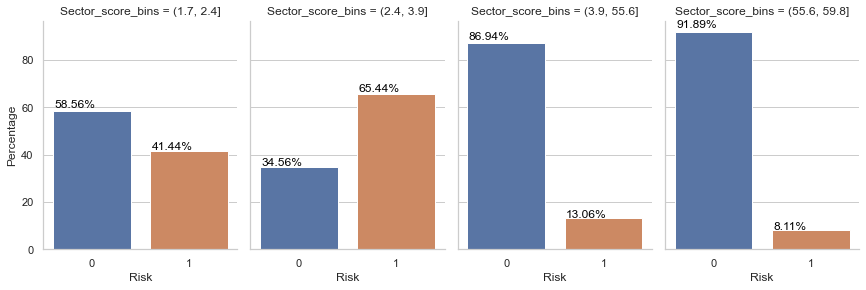

In [42]:
plot_Risk_per_var('Sector_score_bins',height=4,aspect=0.75,size="medium")

<font color='red' style="font-weight:bold;">
<font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Sector core vs Risk</u></p> </font>   
<p>
<li>
The above graph shows the percentage distribution of Risk Category per binned Sector Scores (This is to see what % of firms falling under a particular Sector score is under Risk). This is a slightly different perspective than the graph shown before.
We can see that firms that usually fall under the 3rd and 4th Quantile of sector scores usually have no risk. 87% of firms that have a sector score in the 3rd quantile and 91% of the firms whose sector score falls under the 4th quantile have no risk.
</li>
</p>
<p>
<li>
Hence Sector Score can be a great indicator of risky firms. Lower the score, higher is the chance of a firm being risky
</li>
</p>

</font>

## LOCATION_ID vs Risk


Here, we compare Location_ID and Risk to answer 2 questions : 
<p><b> 1. Where are most of the Risky companies concentrated?</b></p>
<p><b> 2. Which location has more Risky companies than non-risky companies? </b></p>

To answer the first question, please view the graph below

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


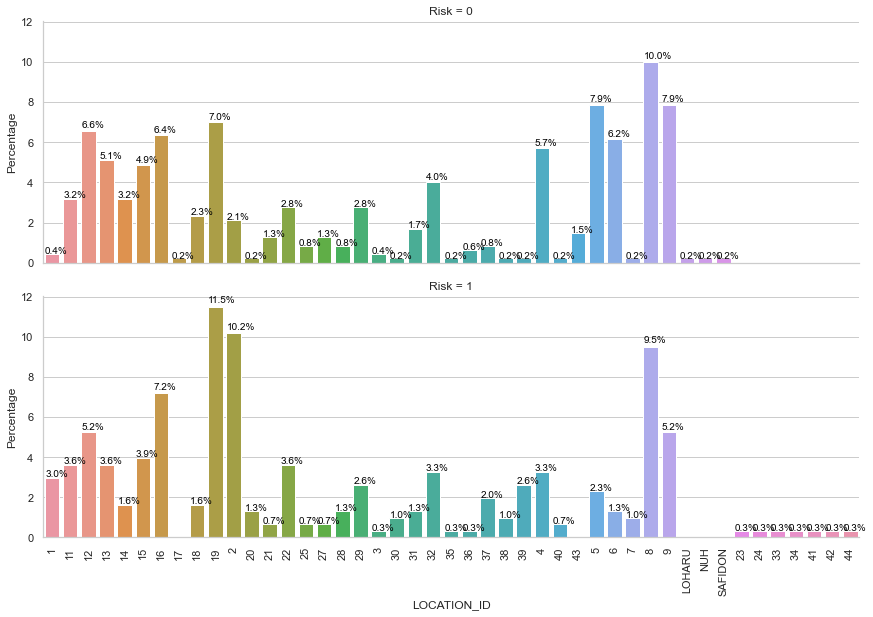

In [44]:
plot_var_per_Risk('LOCATION_ID',height=4, aspect=3, size='small',col_wrap=1,precision=1,rotation=90)


<font color='red' style="font-weight:bold;">

<p>
The above graph shows that risky companies are concentrated in 4 Location_IDs 19,2,8,16 which respecitively
have 11%,10%,9% and 7% of all the risky companies
</p>
</font>

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


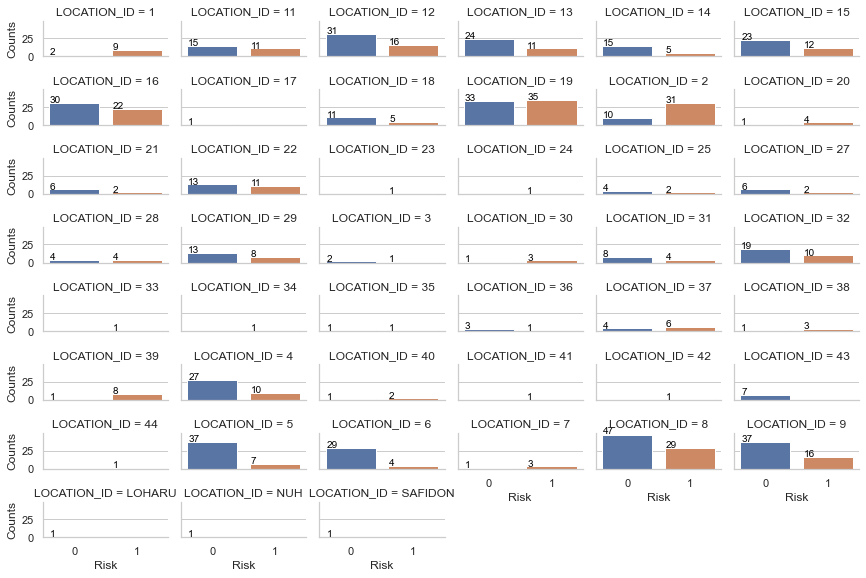

In [11]:
df_fraud_Location_R=df_fraud.groupby(['LOCATION_ID','Risk'])['Score'].count()
df_fraud_Location_R
df_fraud_Location_R_1=df_fraud_Location_R.reset_index()
df_fraud_Location_R_1.rename(columns={"Score": "Counts"},inplace=True)
#sns.set_theme(style="darkgrid")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Risk",y="Counts",col="LOCATION_ID",col_wrap=6
                ,data=df_fraud_Location_R_1
                ,orient="v",
                kind='bar', height=1, aspect=2, legend=True)


g.set_xticklabels(rotation=0)


for i in range(45):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='small')

<font color='red' style="font-weight:bold;">
<p>
The above graph tries to answer the question : <font color='blue' style="font-weight:bold;">Which location has more Risky companies than non-risky companies? Trying to answer that question, we can see the following : </font>
</p>
<p>
    <li>
There are 7 locations that have just 1 firm and are fraudulent (23,24,33,34,41,44,42)
    </li>
</p>
<p>
     <li>
Location_IDs 5,6,8,9,14,15 have more than 50% of their companies non-fraudulent, which indicates good regulations and auditing in these locations.
 </li>
</p>
<p>
     <li>
Location_IDs 2 and 19 have a large percentage of risky firms.Hence there should be more regulations and audits in these locations. It may also  
 indicate that the authorities in these locations are more susceptible to fraud, and education must be provided to authorities in these locations to prevent fraud from happening. </li>
</p>    
<p>
     <li>
There are some locations having different names than usual, like LOCATION_ID = LOHARU, NUH, SAFIDON that have to be cleaned. The locations can be cleaned by just keeping the top 15 locations and categorizing other Location_IDs as others. </li>
</p>
</font>

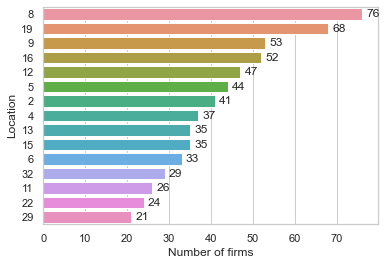

In [54]:
## Plotting top 15 location_ids in the order of number of firms

ax = sns.barplot(y="LOCATION_ID", x="Score", data=df_fraud.groupby(['LOCATION_ID'])['Score'].count().reset_index().sort_values(by='Score',ascending=False).head(15))
ax.set(xlabel="Number of firms", ylabel='Location')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

<font color='red' style="font-weight:bold;">
The above graph shows the top 15 Location_IDs in terms of number of companies/firms. In the modelling phase, only these Location_ids will be used, and the other location_ids will be categorized as 'Others'
</font>

## PARA_A vs Risk

Since PARA_A (Discrepancy found in Report A), is a continuous variable, it will be helpful to bucketize based on quantiles to extract more meaning. Hence bucketizing into 4 quantiles

In [83]:
# Bin Sector score
"""
Binning is based on Quantiles : 

Minimum	0
5-th percentile	0
Q1	0.21
median	0.875
Q3	2.48
95-th percentile	9.9775
Maximum	85
Range	85
Interquartile range (IQR)	2.27

"""

df_fraud['PARA_A_bins'] = pd.qcut(df_fraud['PARA_A'], q=4,duplicates='drop',precision=0)


<Figure size 288x216 with 0 Axes>

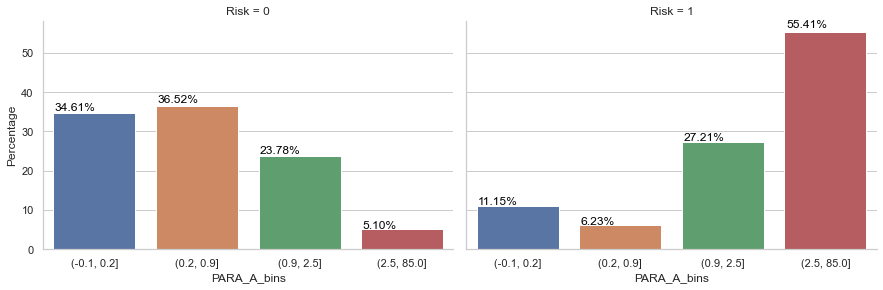

In [84]:
plot_var_per_Risk('PARA_A_bins',col_wrap=4,height=4, aspect=1.5,size='medium')

<font color='red' style="font-weight:bold;">   
   <p><li> Almost 70% of Non-Risky firms are have PARA_A value in the first and the second quantile.
    </li></p>
    <p><li> About 82% of Risky firms have high PARA_A value (in the 3rd and 4th Quantile) are found to be Risky in nature.</li></p>
    <p><li>Hence, Lower the discrepancies in audit reports, lower is the risk of being fraudulent.Hence, PARA_A value could play a pivotal role in determining the risk of a firm </li></p>


</font>

<Figure size 288x216 with 0 Axes>

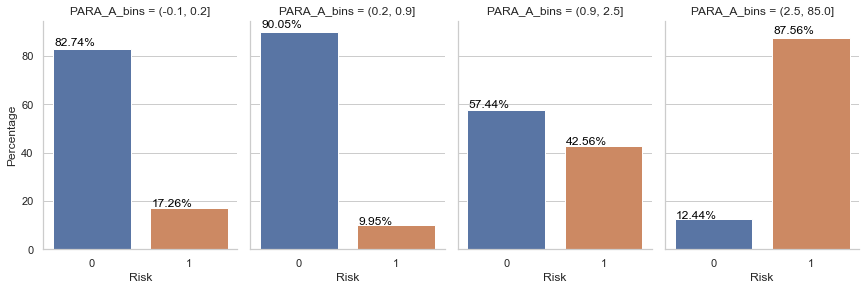

In [85]:
plot_Risk_per_var('PARA_A_bins',height=4, aspect=0.75,col_wrap=4,size='medium')

<font color='red' style="font-weight:bold;"> 
   <p><li> On dicing the data per PARA_A_bin, we see a similar result as above.
    </li></p>
    <p><li> About 87% of firms that have high PARA_A value are found to be Risky in nature, and 90% of the firms
        that have low discrepancies in their reports are non-risky in nature.</li></p>
    


</font>

 ## PARA_B vs Risk

I bucketize PARA_B values, similar to what was performed with PARA_A

In [16]:
# Bin Sector score
"""
Binning is based on Quantiles : 

Minimum	0
5-th percentile	0
Q1	0
median	0.405
Q3	4.16
95-th percentile	61.665
Maximum	1264.63
Range	1264.63
Interquartile range (IQR)	4.16

"""

df_fraud['PARA_B_bins'] = pd.qcut(df_fraud['PARA_B'], q=4,duplicates='drop',precision=0)
#df_fraud['PARA_B_bins'] = df_fraud['PARA_B'].apply(lambda x :bin_PARA_B(x))

<Figure size 288x216 with 0 Axes>

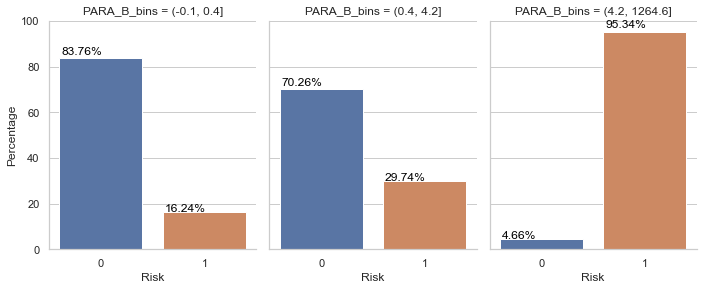

In [17]:
plot_Risk_per_var('PARA_B_bins',height=4, aspect=0.8,col_wrap=4,size='medium')

<font color='red' style="font-weight:bold;">
    <p><li> We see similar results as when we compared PARA_A value, for the PARA_B value.
    </li></p>
    <p><li> About 95% of firms that have high PARA_B value (In the 4th Quantile) are found to be Risky in nature, and 84% of the firms that have low discrepancies (in the 1st Quantile) in their reports are non-risky in nature.</li></p>
     <p><li>Hence, Lower the PARA_B value, more is the propensity of a firm to be non-risky, which makes intuitive sense because non-riskier firms tend to have better accounting of their expenditures, wheras riskier firms who tend to be fraudulent might try different ways to route expenditures, and might leave certain areas uncovered. Thus,PARA_B value could play a pivotal role in determining the risk of a firm, and is very similar to PARA_A </li></p>


</font>

 ## Numbers vs Risk

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


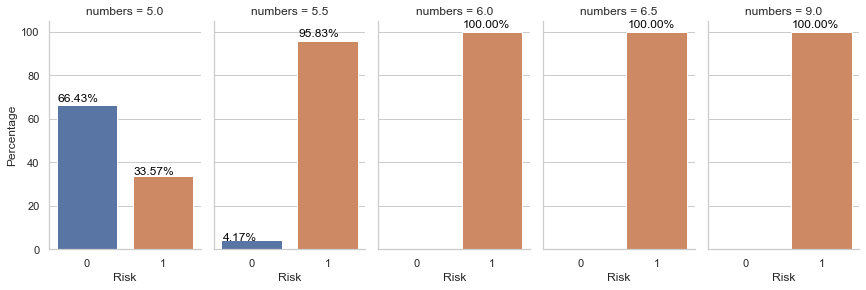

In [67]:
plot_Risk_per_var('numbers',col_wrap=5,height=4, aspect=0.6,size='medium')

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


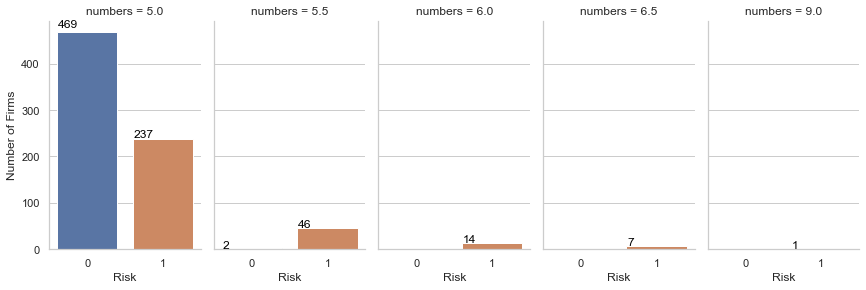

In [33]:
df_fraud_numbers=df_fraud.groupby(['numbers','Risk'])['Score'].count()
df_fraud_numbers
df_fraud_numbers_1=df_fraud_numbers.reset_index()
df_fraud_numbers_1.rename(columns={"Score": "Number of Firms"},inplace=True)
#sns.set_theme(style="darkgrid")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 3))
g = sns.catplot(x="Risk",y="Number of Firms",col="numbers",col_wrap=5
                ,data=df_fraud_numbers_1
                ,orient="v",
                kind='bar', height=4, aspect=0.6, legend=True)


#g.facet_axis(0,1)
 

for i in range(5):
    ax = g.facet_axis(i,i)
    for p in ax.patches:
        ax.text(p.get_x() + 0.015, 
                p.get_height() * 1.02, 
                '{0:.0f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='medium')

<font color='red' style="font-weight:bold;">
   
 <font color='blue' style="font-weight:bold;"><p><u>Takeaways from the analysis of numbers vs Risk</u></p> </font>   
    On analysing Numbers with risk, we see the following: 
    <p><li> Any value of numbers (Historical discrepancy score) above 5.5 is 100% risky and it is most likely
        to be a fraudulent company
    </li></p>
    <p><li> Non-Fraudulent firms have number of discrepancies less than 5.5 usually
    </li></p>
    <p><li><u>Caveat</u> : Even though Numbers seem to look like a good indicator of risky firms, one needs to be careful because the number of firms we have with Higher Numbers(=6,6.5 and 9) are very less in comparison to the number of firms with lower numbers (5 and 5.5)
    </li></p>
</font>

## Money_Value vs Risk

I have Binned Money_value variable in accordance to quantiles as shown below

In [89]:
# Bin Sector score
"""
Binning is based on Quantiles : 

Minimum	0
5-th percentile	0
Q1	0
median	0.09
Q3	5.595
95-th percentile	61.57
Maximum	935.03
Range	935.03
Interquartile range (IQR)	5.595
"""

df_fraud['Money_Value_bins'] = pd.qcut(df_fraud['Money_Value'], q=4,duplicates='drop',precision=0)


<Figure size 288x216 with 0 Axes>

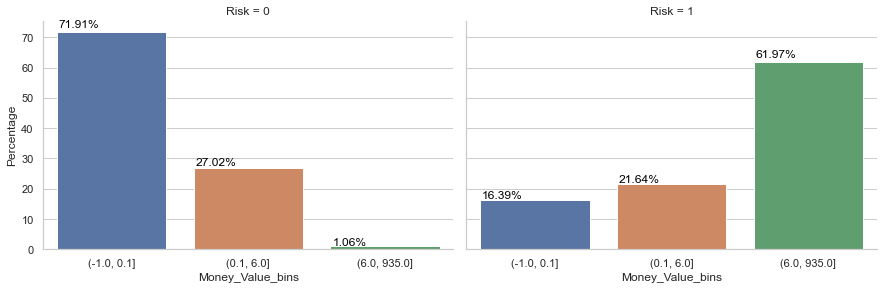

In [90]:
plot_var_per_Risk('Money_Value_bins',col_wrap=4,height=4, aspect=1.5,size='medium')

<Figure size 288x216 with 0 Axes>

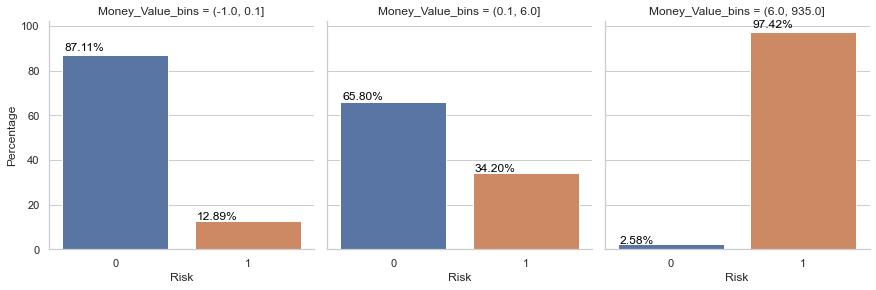

In [91]:
plot_Risk_per_var('Money_Value_bins',col_wrap=4,height=4, aspect=1,size='medium')

<font color='red' style="font-weight:bold;">
   
 <font color='blue' style="font-weight:bold;"><p><u>TAKEAWAYS from the analysis of Money Value vs Risk</u></p> </font>   
   <p><li> 71% of the firms that are not risky/fraudulent have lower money value, 62% of the firms that are risky have higher money value.
    </li></p>
    <p><li> 97% of companies that have higher money value are fraudulent, and 87% of companies that have lower money value are non-fraudulent.</li></p>
     <p><li>Hence, Money value should be taken as an alarm to detect if a company is fraudulemnt or not. A company will be most likely fraudulent if the amount of money in mis-statements are higher.</li></p>


</font>

## District_Loss vs Risk

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


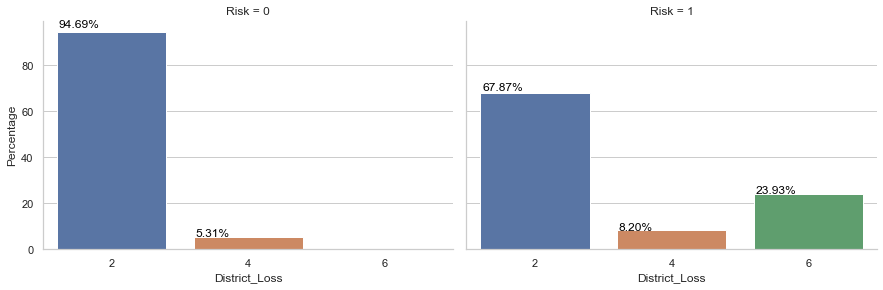

In [73]:
plot_var_per_Risk('District_Loss',col_wrap=4,height=4, aspect=1.5,size='medium')

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


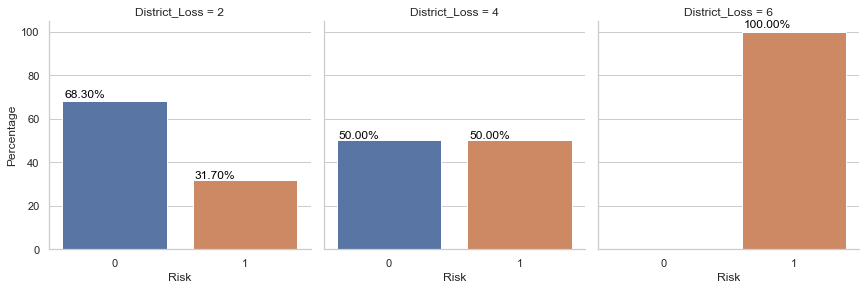

In [74]:
plot_Risk_per_var('District_Loss',col_wrap=3,height=4, aspect=1,size='medium')

<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Takeaways
         from the analysis of District Loss and Risk</u></p> </font> 
<p>
    
<li>
As we can see from the above 2 graphs, all firms having District Loss = 6 are fraudulent, and all the non-fraudulent firms are mostly having district loss = 2 or 4.
</li>
</p>   
<p>
    
<li>
This indicates that Propensity of being a fraudulent firm increases as District Loss increases
</li>
</p>


</font>

## History vs Risk

<Figure size 288x216 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


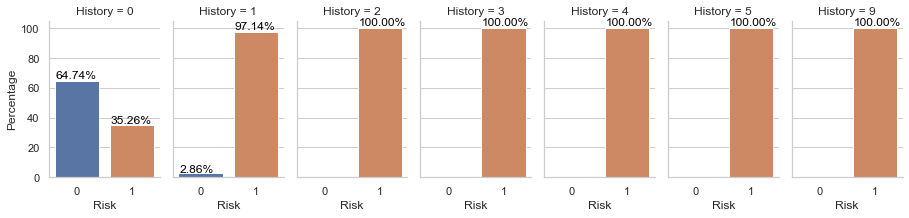

In [76]:
plot_Risk_per_var('History',col_wrap=7,height=3, aspect=0.6,size='medium')

<font color='red' style="font-weight:bold;">
     <font color='blue' style="font-weight:bold;"><p><u>Takeaways from the analysis of History and Risk</u></p> </font> 
 <p>
    
<li>
From the above graph, we can notice that all firms who have History>=2 are definitely Risky. Non-risky firms have History values 0 or 1.
</li>
</p>  
<p>
    
<li>
Lesser the Historical loss sufferred by a firm, lesser is its propensity to be risky/fraudulent
</li>
</p>


</font>

## Score vs Risk

In [92]:
# Bin Sector score
"""
Binning is based on Quantiles : 


Minimum	2
5-th percentile	2
Q1	2
median	2.4
Q3	3.25
95-th percentile	4.4
Maximum	5.2
Range	3.2
Interquartile range (IQR)	1.25

"""

df_fraud['Score_bins'] = pd.qcut(df_fraud['Score'], q=4,duplicates='drop',precision=0)


<Figure size 288x216 with 0 Axes>

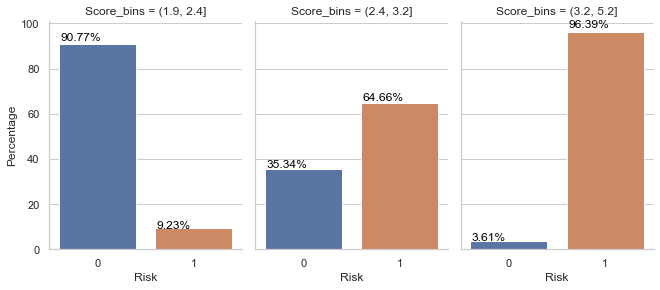

In [94]:
plot_Risk_per_var('Score_bins',col_wrap=4,height=4, aspect=0.75,size='medium')

<font color='red' style="font-weight:bold;">
   
 <font color='blue' style="font-weight:bold;"><p><u>Takeaways from the analysis of Score vs Risk</u></p> </font>   
   <p><li> We can see that 90% of the firms that have lower value for Score (in the 1st quantile) are non-fraudulent and 96% of the firms in the highest quantile are fraudulent.
    </li></p>
 <p><li> As Score increases, the Propensity of Risk Increases
    </li></p>


</font>

# Classification Model to predict Fraud

Now that we have performed in-depth Exploratory analysis, let's dive into the pre-processing and modelling phase.


I personally tend to use PyCaret for all modelling tasks. It is a personal preference since Pycaret is a low code, and higly efficient library that is capable of providing great results in very less span of time.

Hence, if you want to execute the below lines of code, please install PyCaret first, to avoid errors

In [25]:
from pycaret.classification import *

## Pre-Processing

For pre-processing of variables, I followed the following steps : 
1. For numerical variables, I binned them according to quantiles
2. For categorical variables, I one-hot encode them.
3. For categorical variables with many values (History and Location_ID), I take only top values and categorize the rest as 'Others'

In [19]:
"""
Replace the NULL Money value with 0 
"""
df_fraud['Money_Value'] = df_fraud['Money_Value'].fillna(0)

"""
Rationale : 
because PARA_A and PARA_B values are very low
"""

In [30]:
df_fraud[df_fraud['Money_Value'].isnull()]

Sector_score LOCATION_ID  PARA_A  PARA_B  numbers  Money_Value  \
642         55.57           4    0.23     0.0      5.0          NaN   

     District_Loss  History  Score  Risk  
642              2        0    2.0     0

In [20]:
"""
Bin all numerical features based on Qcut
"""
df_fraud['Sector_score_bins'] = pd.qcut(df_fraud['Sector_score'], q=4,duplicates='drop',precision=0)
df_fraud['PARA_A_bins'] = pd.qcut(df_fraud['PARA_A'], q=4,duplicates='drop',precision=0)
df_fraud['PARA_B_bins'] = pd.qcut(df_fraud['PARA_B'], q=4,duplicates='drop',precision=0)
df_fraud['Money_Value_bins'] = pd.qcut(df_fraud['Money_Value'], q=4,duplicates='drop',precision=0)
df_fraud['Score_bins'] = pd.qcut(df_fraud['Score'], q=4,duplicates='drop',precision=0)


In [21]:
"""
Reduce the number of categories in History, Location_id
"""
top_location_ids = list(df_fraud.groupby(['LOCATION_ID'])['Score'].
                        count().reset_index().sort_values(by='Score',ascending=False).head(15)['LOCATION_ID'])

df_fraud['LOCATION_ID'] = df_fraud['LOCATION_ID'].apply(lambda x : x if x in top_location_ids else 'Other' )

####################

top_History =list(df_fraud.groupby(['History'])['Score'].
                       count().reset_index().sort_values(by='Score',ascending=False).head(3)['History'])
df_fraud['History'] = df_fraud['History'].apply(lambda x : x if x in top_History else 'Other' )

In [22]:
df_fraud.head()

Sector_score LOCATION_ID  PARA_A  PARA_B  numbers  Money_Value  \
0          3.89       Other    4.18    2.50      5.0         3.38   
1          3.89           6    0.00    4.83      5.0         0.94   
2          3.89           6    0.51    0.23      5.0         0.00   
3          3.89           6    0.00   10.80      6.0        11.75   
4          3.89           6    0.00    0.08      5.0         0.00   

   District_Loss History  Score  Risk    PARA_B_bins Sector_score_bins  \
0              2       0    2.4     1     (0.4, 4.2]        (2.4, 3.9]   
1              2       0    2.0     0  (4.2, 1264.6]        (2.4, 3.9]   
2              2       0    2.0     0    (-0.1, 0.4]        (2.4, 3.9]   
3              2       0    4.4     1  (4.2, 1264.6]        (2.4, 3.9]   
4              2       0    2.0     0    (-0.1, 0.4]        (2.4, 3.9]   

   PARA_A_bins Money_Value_bins  Score_bins  
0  (2.5, 85.0]       (0.1, 6.0]  (1.9, 2.4]  
1  (-0.1, 0.2]       (0.1, 6.0]  (1.9, 2.4]  
2   (0.2, 0.9]      (-1.0, 0.1]  (1.9, 2.4]  
3  (-0.1, 0.2]     (6.0, 935.0]  (3.2, 5.2]  
4  (-0.1, 0.2]      (-1.0, 0.1]  (1.9, 2.4]

In [101]:
df_fraud.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers',
       'Money_Value', 'District_Loss', 'History', 'Score', 'Risk',
       'Sector_score_bins', 'PARA_A_bins', 'PARA_B_bins', 'Money_Value_bins',
       'Score_bins'],
      dtype='object')

## Setting up the Pre-processing pipeline

The below process with the `setup` function is responsible for setting up the Pre-processing  pipeline, fixing class imbalances, and in defining the type of pre-processing depending on the type of variables (Categorical and numerical).

In the below function, I am using SMOTE oversampling metjod to fix class imbalance existing in the dataset. A hold-out set of 30% is sampled from the dataset to be used for later validation of tuned models.

In [26]:
exp_class_fraud = setup(data = df_fraud, target = 'Risk', 
                   ignore_features=['Sector_score','PARA_A','PARA_B','Money_Value','District_Loss','Score'],
                   categorical_features=['Sector_score_bins', 'PARA_A_bins', 'PARA_B_bins', 'Money_Value_bins',
       'Score_bins', 'LOCATION_ID','numbers', 'District_Loss','History'],
                   session_id=123,silent=True, fix_imbalance=True) 

Setup Succesfully Completed!


The function `get_config()` is used to obtain all the parameteres of the pre-processing pipeline necessary. In the below lines of code, I am obtaining the transformed dataset and preprocessing-pipeline and showing them as outputs

In [34]:
"""

X: Transformed dataset (X)
y: Transformed dataset (y)  
X_train: Transformed train dataset (X)
X_test: Transformed test/holdout dataset (X)
y_train: Transformed train dataset (y)
y_test: Transformed test/holdout dataset (y)
"""

X = get_config('X')
y = get_config('y')   
X_train = get_config('X_train')    
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')
prep_pipe =get_config('prep_pipe')

In [28]:
X_train.columns

Index(['LOCATION_ID_11', 'LOCATION_ID_12', 'LOCATION_ID_13', 'LOCATION_ID_15',
       'LOCATION_ID_16', 'LOCATION_ID_19', 'LOCATION_ID_2', 'LOCATION_ID_22',
       'LOCATION_ID_29', 'LOCATION_ID_32', 'LOCATION_ID_4', 'LOCATION_ID_5',
       'LOCATION_ID_6', 'LOCATION_ID_8', 'LOCATION_ID_9', 'LOCATION_ID_Other',
       'numbers_5.0', 'numbers_5.5', 'numbers_6.0', 'numbers_6.5',
       'numbers_9.0', 'History_0', 'History_1', 'History_2', 'History_Other',
       'PARA_B_bins_(-0.1 0.4', 'PARA_B_bins_(0.4 4.2',
       'PARA_B_bins_(4.2 1264.6', 'Sector_score_bins_(1.7 2.4',
       'Sector_score_bins_(2.4 3.9', 'Sector_score_bins_(3.9 55.6',
       'Sector_score_bins_(55.6 59.8', 'PARA_A_bins_(-0.1 0.2',
       'PARA_A_bins_(0.2 0.9', 'PARA_A_bins_(0.9 2.5', 'PARA_A_bins_(2.5 85.0',
       'Money_Value_bins_(-1.0 0.1', 'Money_Value_bins_(0.1 6.0',
       'Money_Value_bins_(6.0 935.0', 'Score_bins_(1.9 2.4',
       'Score_bins_(2.4 3.2', 'Score_bins_(3.2 5.2'],
      dtype='object')

In [35]:
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sector_score_bins',
                                                            'PARA_A_bins',
                                                            'PARA_B_bins',
                                                            'Money_Value_bins',
                                                            'Score_bins',
                                                            'LOCATION_ID',
                                                            'numbers',
                                                            'District_Loss',
                                                            'History'],
                                      display_types=False,
                                      features_todrop=['Sector_score', 'PARA_A',
                                                       'PARA_B', 'Money_Value',
                                                   

## Modelling for Fraud

### Building top 10 models

In [107]:
"""
Comparing top 10 models, each built using 15-fold Cross validation
"""
best = compare_models(n_select = 10,fold=15, sort = 'AUC')

### Tuning Hyperparameters of top 10 models

In [108]:
"""
Tuning the hyperparameters of the top 10 models
"""
tuned_models=[tune_model(i) for i in best]

In [109]:
"""
Printing all the tuned models
"""
tuned_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.02, loss='deviance', max_depth=60,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=4, min_samples_split=10,
                            min_weight_fraction_leaf=0.0, n_estimators=125,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=123, subsample=0.45000000000000007,
                            tol=0.0001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.07, max_delta_step=0, max_d

In [110]:
"""
Predictions on the holdout set,using top 10 tuned models
"""
predicts_holdout_set=[predict_model(i) for i in tuned_models]

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Gradient Boosting Classifier    0.9056  0.9687  0.8696  0.8889  0.8791   

    Kappa     MCC  
0  0.8017  0.8018

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  CatBoost Classifier    0.9099  0.9725  0.8913  0.8817  0.8865  0.8118   

      MCC  
0  0.8118

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Extreme Gradient Boosting    0.8927  0.9573  0.8261  0.8941  0.8588   

    Kappa    MCC  
0  0.7725  0.774

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.9056  0.9625  0.8804  0.8804  0.8804   

    Kappa     MCC  
0  0.8024  0.8024

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression     0.897  0.9623  0.8478  0.8864  0.8667  0.7828   

      MCC  
0  0.7833

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.9142  0.9726  0.8913  0.8913  0.8913  0.8204   

      MCC  
0  0.8204

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Linear Discriminant Analysis     0.897  0.9497  0.8152  0.9146  0.8621   

    Kappa     MCC  
0  0.7803  0.7836

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Ada Boost Classifier     0.897  0.9675  0.8261  0.9048  0.8636  0.7812   

      MCC  
0  0.7832

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.8927  0.9375  0.8152  0.9036  0.8571  0.7716   

      MCC  
0  0.7742

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Naive Bayes    0.8798  0.9593  0.7935  0.8902  0.8391  0.7437  0.7468

<font color='red' style="font-weight:bold;">
   We see that Gradient Boosting Classifier model produces the highest AUC. Hence we will be using that as the Champion model for further analysis

</font>

## Feature importances

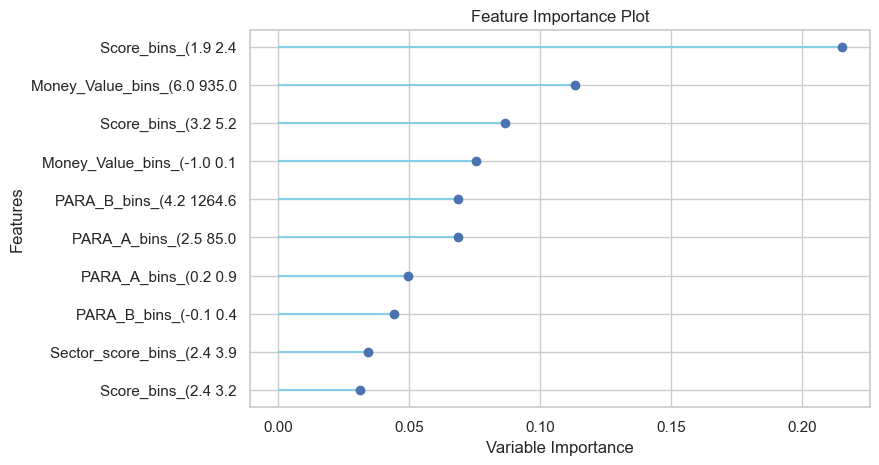

In [112]:
gbc = tuned_models[0]
plot_model(gbc, plot='feature')

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>Takeaways from the Feature Importance plot</u></p> </font>
<p><li> Score in the lower quantile is the most important feature. It is most probably due to the fact that if a firm has a lower score, then it is most likely non-risky in nature</li></p>
<p><li> Money Value in the highest quantile is the 2nd most important because if a firm falling into this bucket, it is most likely at risk</li></p>
    <p><li> PARA_A and PARA_B are also showing up as critical features to determine the riskiness of a company</li></p>
</font>




## AUC Plot

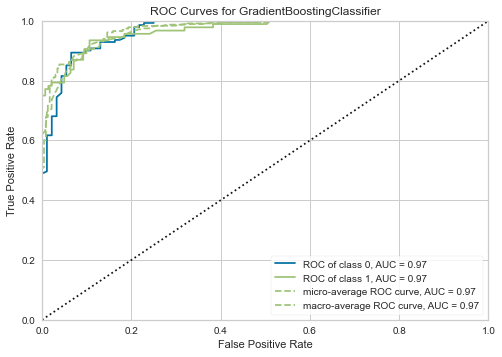

In [113]:
plot_model(gbc, plot='auc')

## Confusion Matrix

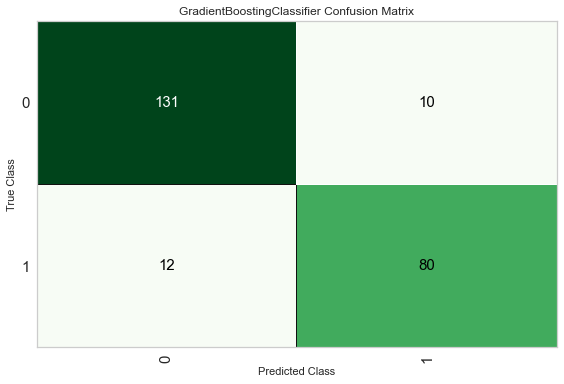

In [114]:
plot_model(gbc, plot='confusion_matrix')

## Using SHAP values to explain the model

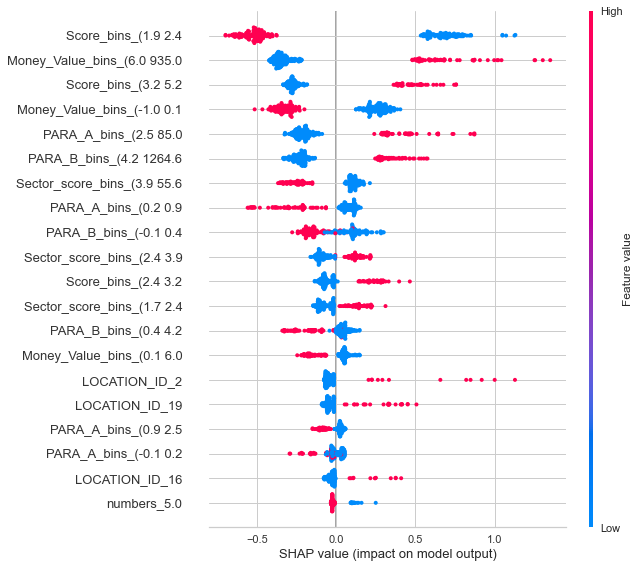

In [115]:
interpret_model(gbc)

<font color='red' style="font-weight:bold;">
    <font color='blue' style="font-weight:bold;"><p><u>Takeaways from SHAP plot</u></p> </font>
<p><li> As Score in the first quantile increases in value, then model output decreases. i.e. as the feature Score_bins_(1.9 2.4) becomes 1, then Risk becomes 0. In other words, When a firm has low values of Score, it is most likely to be non-risky </li></p>
<p><li> As Money_value in the fourth quantile increases in value, then model output increases. i.e. as the feature Money_Value_bins_(6.0 935.0 becomes 1, then Risk becomes 1. In other words, When a firm has high values of Money_values, it is most likely to be risky </li></p>
<p><li> In a nutshell, Score,Money_value,PARA_A, PARA_B values are found to be very important in determining risk </li></p>
</font>
